## 실습 1: 사람 키로 몸무게 예측

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])

['NanumGothic']


In [73]:
df = pd.read_csv("./data/student.csv", engine='python', encoding='cp949')

In [74]:
# 데이터셋 크기 및 확인
print(f"Dataset size: {df.shape}")
df.head()

Dataset size: (9686, 25)


,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [33]:
# 데이터셋 info 확인, null값 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9682 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9682 non-null   object 
 1   최종가중치       9682 non-null   float64
 2   학교ID        9682 non-null   object 
 3   도시규모        9682 non-null   object 
 4   도시규모별분석용    9682 non-null   object 
 5   학년도         9682 non-null   int64  
 6   광역시도        9682 non-null   object 
 7   시도별         9682 non-null   object 
 8   학교급별        9682 non-null   int64  
 9   학교명         9682 non-null   object 
 10  공학여부        9682 non-null   object 
 11  학년          9682 non-null   int64  
 12  반           9682 non-null   int64  
 13  성별          9682 non-null   object 
 14  건강검진일       9682 non-null   int64  
 15  키           9682 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [17]:
df.isnull().sum()

ID               0
최종가중치            0
학교ID             0
도시규모             0
도시규모별분석용         0
학년도              0
광역시도             0
시도별              0
학교급별             0
학교명              0
공학여부             0
학년               0
반                0
성별               0
건강검진일            0
키                0
몸무게              4
혈당식전mgdl      9348
총콜레스테롤mgdl    9347
ASTUL         9350
ALTUL         9349
혈색소gdl        9108
간염검사          8855
수축기           6661
이완기           6661
dtype: int64

In [18]:
df.describe()

,최종가중치,학년도,학교급별,학년,반,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9.686000e+03,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,2.015047e+07,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,1.014788e+02,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,2.015023e+07,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,2.015041e+07,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,2.015043e+07,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,2.015051e+07,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,2.015091e+07,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


In [75]:
# 몸무게가 NaN 값인 행 삭제
df.dropna(subset=['몸무게'], axis=0, inplace=True)

In [76]:
# 독립변수와 종속변수 선택
ndf = df[['키', '몸무게']]
ndf.head()

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


### 1) 사람 키와 몸무게 두 변수에 대한 산점도 그리기

<AxesSubplot:xlabel='키', ylabel='몸무게'>

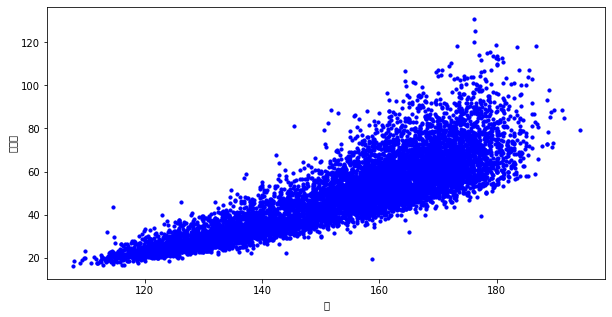

In [77]:
ndf.plot(kind='scatter', x='키', y='몸무게', c='blue', s=10, figsize=(10,5))

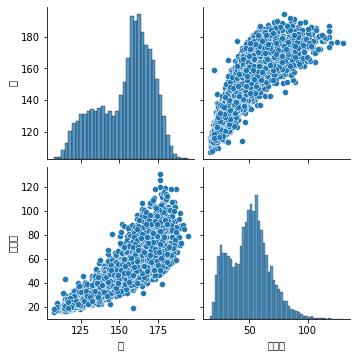

In [52]:
grid_ndf = sns.pairplot(ndf)

### 2) 사람 키(키) 데이터를 가지고 몸무게를 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)

In [78]:
# dataset train, test split
X = ndf[['키']]
Y = ndf['몸무게']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"train dataset size: {x_train.shape}")
print(f"test dataset size: {x_test.shape}")

train dataset size: (6777, 1)
test dataset size: (2905, 1)


In [80]:
# 학습
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

print(f"Original Data: {x_train.shape}")
print(f"Polynomial Data: {x_train_poly.shape}")

Original Data: (6777, 1)
Polynomial Data: (6777, 3)


In [81]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

LinearRegression()

### 3) 회귀식의 기울기와 y 절편 구하기

In [82]:
print(f'기울기: {pr.coef_}')
print(f'Y 절편: {pr.intercept_}')

기울기: [ 0.         -0.12459371  0.00325032]
Y 절편: -9.173762032936331


### 4) R^2, MSE 계산하기

In [84]:
# 예측 및 R**2, MSE 계산
x_test_poly = poly.fit_transform(x_test)
y_pred = pr.predict(x_test_poly)

mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r_square}")

MSE: 79.21796992410256
R^2: 0.7318059848127074


## 실습 2: 보스톤 집값 예측 모델

**타겟 변수**  
>Target: 1978년도 보스턴 주택 가격  
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)   

  
**특성 변수**  
>CRIM: 범죄율  
INDUS: 비소매상업지역 면적 비율  
NOX: 일산화질소 농도  
RM: 주택당 방 수  
LSTAT: 인구 중 하위 계층 비율  
B: 인구 중 흑인 비율  
PTRATIO: 학생/교사 비율  
ZN: 25,000 평방피트를 초과 거주지역 비율  
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
AGE: 1940년 이전에 건축된 주택의 비율  
RAD: 방사형 고속도로까지의 거리  
DIS: 직업센터의 거리  
TAX: 재산세율  

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
df = pd.read_csv("./data/Boston_house.csv", engine='python')

In [86]:
print(f"size of df: {df.shape}")
df.head()

size of df: (506, 14)


,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [88]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


### 1) 주택 방 수와 집값 두 변수에 대한 산점도 그리기

In [89]:
# 독립변수와 종속변수 선택
ndf = df[['RM', 'Target']]
ndf.head()

,RM,Target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


<AxesSubplot:xlabel='RM', ylabel='Target'>

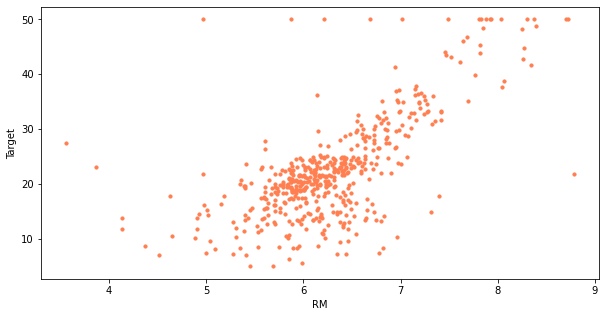

In [90]:
# 산점도
ndf.plot(kind='scatter', x='RM', y='Target', c='coral', s=10, figsize=(10,5))

In [146]:
ndf2 = ndf.iloc[ndf[(ndf['Target'] <50) | (ndf['RM'] >= 7)].index]
ndf2 = ndf2[(ndf2['RM'] < 8.5) | (ndf2['Target'] > 30)]
ndf2 = ndf2[ndf2['RM'] > 4]

<AxesSubplot:xlabel='RM', ylabel='Target'>

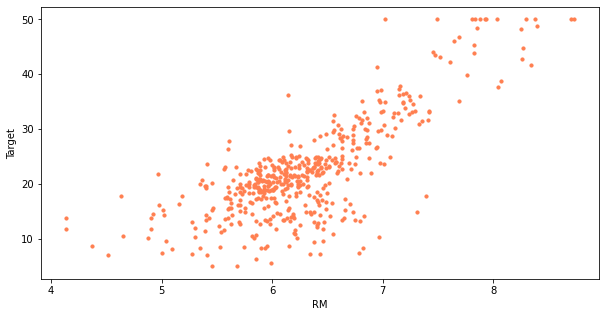

In [147]:
ndf2.plot(kind='scatter', x='RM', y='Target', c='coral', s=10, figsize=(10,5))

### 2) 주택당 방 수(RM) 데이터를 가지고 집값(Target) 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)

In [148]:
# dataset train, test split
X = ndf2[['RM']]
Y = ndf2['Target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"train dataset size: {x_train.shape}")
print(f"test dataset size: {x_test.shape}")

train dataset size: (349, 1)
test dataset size: (150, 1)


In [149]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### 3) 회귀식의 기울기와 y 절편 구하기

In [150]:
print(f'기울기: {lr.coef_}')
print(f'Y 절편: {lr.intercept_}')

기울기: [10.10937636]
Y 절편: -41.14200527170744


### 4)  R^2, MSE 계산하기

In [152]:
# 예측 및 R**2, MSE 계산
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r_square}")

MSE: 29.15964755364792
R^2: 0.571834259367147


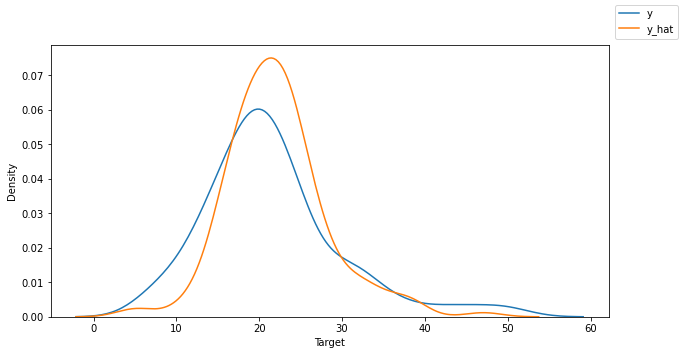

In [153]:
y_hat = lr.predict(x_test)

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False)
ax2 = sns.distplot(y_hat, hist=False, ax=ax1)
fig.legend(labels=['y', 'y_hat'])
plt.show()